# Importing Pandas, matplotlib, seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Importing plotly ,  requires version >= 1.9.0

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__)

2.1.0


# Importing Cufflinks

In [3]:
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


# Loading the Data for Non Veterans for age 18 and above (Annually)

In [4]:
non_veterans_18_and_over_annually=pd.read_csv('NonVeterans_18_and_over_annualy.csv')


In [5]:
non_veterans_18_and_over_annually.head()

,series_id,year,period,value,footnote_codes,date,series_title
0,LNU02049603,2006,M13,64656.0,NaN,12/31/06,"(Unadj) Employment Level - Women, Nonveterans,..."
1,LNU00049603,2006,M13,112069.0,NaN,12/31/06,"(Unadj) Population Level - Women, Nonveterans,..."
2,LNU00049602,2006,M13,84518.0,NaN,12/31/06,"(Unadj) Population Level - Men, Nonveterans, 1..."
3,LNU04049603,2006,M13,4.4,NaN,12/31/06,"(Unadj) Unemployment Rate - Women, Nonveterans..."
4,LNU04049602,2006,M13,4.5,NaN,12/31/06,"(Unadj) Unemployment Rate - Men, Nonveterans, ..."


# Data Processing :  Taking the data for Men, Women and All gender separetly 

In [6]:
non_veterans_18_and_over_annually_all=non_veterans_18_and_over_annually[non_veterans_18_and_over_annually['series_title']=="(Unadj) Unemployment Rate - Nonveterans, 18 years and over"]
non_veterans_18_and_over_annually_women=non_veterans_18_and_over_annually[non_veterans_18_and_over_annually['series_title']=="(Unadj) Unemployment Rate - Women, Nonveterans, 18 years and over"]
non_veterans_18_and_over_annually_men=non_veterans_18_and_over_annually[non_veterans_18_and_over_annually['series_title']=="(Unadj) Unemployment Rate - Men, Nonveterans, 18 years and over"]


In [7]:
non_veterans_18_and_over_annually_all.head()

,series_id,year,period,value,footnote_codes,date,series_title
6,LNU04049601,2006,M13,4.4,NaN,12/31/06,"(Unadj) Unemployment Rate - Nonveterans, 18 ye..."
35,LNU04049601,2007,M13,4.4,NaN,12/31/07,"(Unadj) Unemployment Rate - Nonveterans, 18 ye..."
53,LNU04049601,2008,M13,5.6,NaN,12/31/08,"(Unadj) Unemployment Rate - Nonveterans, 18 ye..."
65,LNU04049601,2009,M13,9.1,NaN,12/31/09,"(Unadj) Unemployment Rate - Nonveterans, 18 ye..."
87,LNU04049601,2010,M13,9.4,NaN,12/31/10,"(Unadj) Unemployment Rate - Nonveterans, 18 ye..."


In [8]:
non_veterans_18_and_over_annually_men.head()

,series_id,year,period,value,footnote_codes,date,series_title
4,LNU04049602,2006,M13,4.5,NaN,12/31/06,"(Unadj) Unemployment Rate - Men, Nonveterans, ..."
25,LNU04049602,2007,M13,4.6,NaN,12/31/07,"(Unadj) Unemployment Rate - Men, Nonveterans, ..."
38,LNU04049602,2008,M13,6.0,NaN,12/31/08,"(Unadj) Unemployment Rate - Men, Nonveterans, ..."
63,LNU04049602,2009,M13,10.3,NaN,12/31/09,"(Unadj) Unemployment Rate - Men, Nonveterans, ..."
79,LNU04049602,2010,M13,10.5,NaN,12/31/10,"(Unadj) Unemployment Rate - Men, Nonveterans, ..."


In [9]:
non_veterans_18_and_over_annually_women.head()

,series_id,year,period,value,footnote_codes,date,series_title
3,LNU04049603,2006,M13,4.4,NaN,12/31/06,"(Unadj) Unemployment Rate - Women, Nonveterans..."
32,LNU04049603,2007,M13,4.3,NaN,12/31/07,"(Unadj) Unemployment Rate - Women, Nonveterans..."
43,LNU04049603,2008,M13,5.2,NaN,12/31/08,"(Unadj) Unemployment Rate - Women, Nonveterans..."
56,LNU04049603,2009,M13,7.8,NaN,12/31/09,"(Unadj) Unemployment Rate - Women, Nonveterans..."
81,LNU04049603,2010,M13,8.4,NaN,12/31/10,"(Unadj) Unemployment Rate - Women, Nonveterans..."


# Percentage change in Unemployment Rate for All Gender ( 2006-2016)

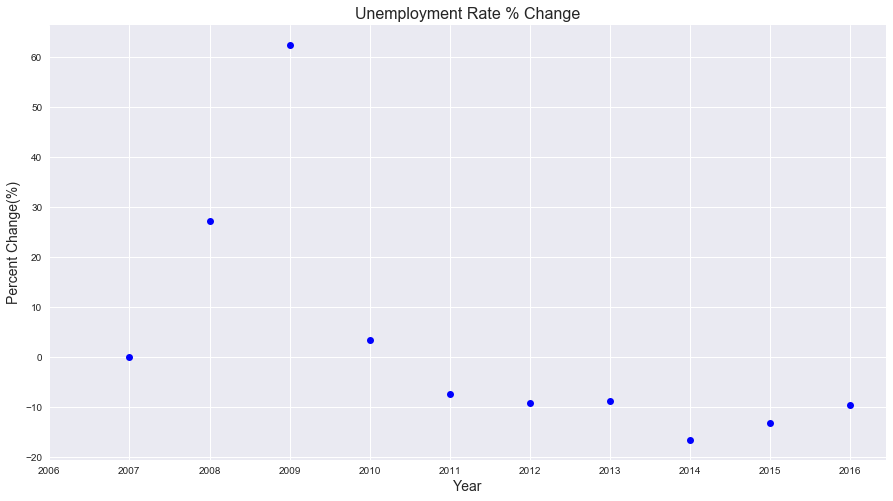

In [10]:

plt.figure(figsize=(15,8))
plt.plot(non_veterans_18_and_over_annually_all['year'],non_veterans_18_and_over_annually_all['value'].pct_change()*100,'bo')
plt.xticks(range(2006,2017))
plt.xlabel('Year',fontdict={'fontsize':14})
plt.ylabel('Percent Change(%)',fontdict={'fontsize':14})
plt.title('Unemployment Rate % Change',fontdict={'fontsize':16})




# Percentage in Unemployment Rate in Men and Women (2006-2016)

In [11]:
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Scatter(
    y = (non_veterans_18_and_over_annually_men['value'].pct_change()*100),
    x = non_veterans_18_and_over_annually_men['year'],
    mode = 'lines+markers',
    name = 'Men Percentage Change',

)
trace1 = go.Scatter(
    y = (non_veterans_18_and_over_annually_women['value'].pct_change()*100),
    x = non_veterans_18_and_over_annually_women['year'],
    mode = 'lines+markers',
    name = 'Women Percentage Change',
)



layout= go.Layout(
    title= 'Unemployment Rate(% Changes)',
    xaxis= dict(
        title= 'Year',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Percentage Change(%)',
        ticklen= 1,
        gridwidth= 2,
        #dtick=0.25
    ),
    showlegend= True
)

data = [trace0,trace1]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=500, width=1000)
iplot(fig)



# Loading the data for all Races (Asian, White, Black or African American,Hispanic or Latino)

In [12]:
non_veterans_anually_races=pd.read_csv('annually_races_over_18.csv')

# Data Processing : Taking the data for all races separately 

In [13]:
non_veterans_anually_races_asian=non_veterans_anually_races[non_veterans_anually_races['series_title']=="(Unadj) Unemployment Rate - Nonveterans, 18 years and over, Asian"]
non_veterans_anually_races_black=non_veterans_anually_races[non_veterans_anually_races['series_title']=="(Unadj) Unemployment Rate - Nonveterans, 18 years and over, Black or African American"]
non_veterans_anually_races_white=non_veterans_anually_races[non_veterans_anually_races['series_title']=="(Unadj) Unemployment Rate - Nonveterans, 18 years and over, White"]
non_veterans_anually_races_hispanic=non_veterans_anually_races[non_veterans_anually_races['series_title']=="(Unadj) Unemployment Rate - Nonveterans, 18 years and over, Hispanic or Latino"]


# Sorting the data frames based on year as few years were jumbled in this case

In [14]:
non_veterans_anually_races_asian=non_veterans_anually_races_asian.sort_values('year')
non_veterans_anually_races_black=non_veterans_anually_races_black.sort_values('year')
non_veterans_anually_races_hispanic=non_veterans_anually_races_hispanic.sort_values('year')
non_veterans_anually_races_white=non_veterans_anually_races_white.sort_values('year')

In [15]:
trace0 = go.Scatter(
    y = (non_veterans_anually_races_asian['value'].pct_change()*100),
    x = non_veterans_anually_races_asian['year'],
    mode = 'lines+markers',
    name = 'Asian Percentage Change',

)
trace1 = go.Scatter(
    y = (non_veterans_anually_races_black['value'].pct_change()*100),
    x = non_veterans_anually_races_black['year'],
    mode = 'lines+markers',
    name = 'Black or African American Percentage Change',
)

trace2 = go.Scatter(
    y = (non_veterans_anually_races_white['value'].pct_change()*100),
    x = non_veterans_anually_races_white['year'],
    mode = 'lines+markers',
    name = 'White Percentage Change',

)
trace3 = go.Scatter(
    y = (non_veterans_anually_races_hispanic['value'].pct_change()*100),
    x = non_veterans_anually_races_hispanic['year'],
    mode = 'lines+markers',
    name = 'Hispanic Percentage Change',
)



layout= go.Layout(
    title= 'Unemployment Rate All Races(% Changes)',
    xaxis= dict(
        title= 'Year',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Percentage Change(%)',
        ticklen= 1,
        gridwidth= 2,
        #dtick=0.25
    ),
    showlegend= True
)

data = [trace0,trace1,trace2,trace3]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=500, width=1000)
iplot(fig)



# Loading the data for overall and employment and unemploymet

In [16]:
regions_data=pd.read_csv('regions_data.csv')

In [17]:
del regions_data['Y']
del regions_data['X']

In [18]:
regions_data

,Year,TotalPopulation,WorkForce,Unemployed,UnemployedPercent,UnemploymentChange
0,2004,292237544,146412978,8086623,5.523,7.666
1,2005,294949463,147697170,7530253,5.098,7.690
2,2006,297809231,149907647,6943141,4.632,9.156
3,2007,300656803,151869049,7017228,4.621,0.238
4,2008,303513730,153430754,8879424,5.787,-25.250
5,2009,306179301,153490119,14199770,9.251,-59.856
6,2010,308743010,153924673,14829974,9.635,-4.143
7,2011,311042881,154255540,13804888,8.949,7.112
8,2012,313363052,154754217,12485784,8.068,9.847
9,2013,315555743,155088770,11433454,7.372,8.626


# Graph showing the overall percentage change in unemployment rate (2003-2016)

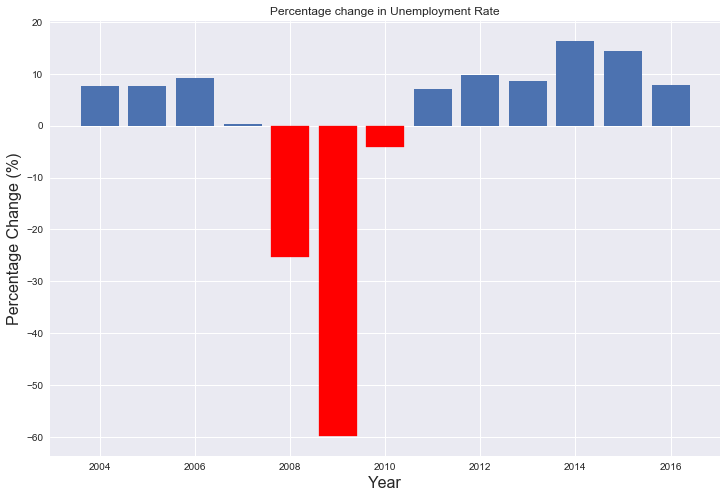

In [19]:
plt.figure(figsize=(12,8))
barlist=plt.bar(left=regions_data['Year'],height=regions_data['UnemploymentChange'])
barlist[4].set_color('r')
barlist[5].set_color('r')
barlist[6].set_color('r')
plt.xlabel("Year",fontdict={'fontsize':16})
plt.ylabel("Percentage Change (%)",fontdict={'fontsize':16})
plt.title('Percentage change in Unemployment Rate')



# Graph showing overall unemplyment rate (%) (2004-2016)

([<matplotlib.axis.YTick at 0x1159c29e8>,
 <a list of 10 Text yticklabel objects>)

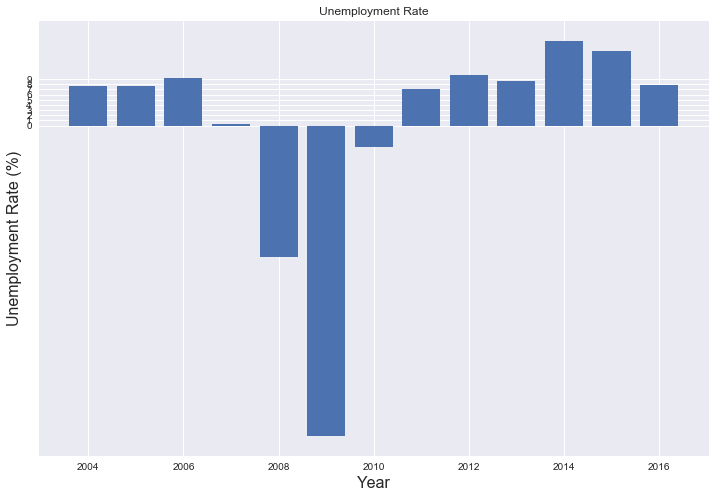

In [20]:
plt.figure(figsize=(12,8))
barlist=plt.bar(left=regions_data['Year'],height=regions_data['UnemploymentChange'])
plt.xlabel("Year",fontdict={'fontsize':16})
plt.ylabel("Unemployment Rate (%)",fontdict={'fontsize':16})
plt.title('Unemployment Rate')
plt.yticks(range(0,10))





# Loading monthly unemployment rate data

In [21]:
non_veterans_monthly_18_and_over_annually=pd.read_csv("NonVeterans_monthly_18_and_over.csv")

In [22]:
non_veterans_monthly_18_and_over_annually_rate=non_veterans_monthly_18_and_over_annually[non_veterans_monthly_18_and_over_annually['series_title'].str.contains("Rate")]

In [23]:
non_veterans_monthly_18_and_over_annually_rate_all=non_veterans_monthly_18_and_over_annually_rate[non_veterans_monthly_18_and_over_annually_rate['series_title']=="(Unadj) Unemployment Rate - Nonveterans, 18 years and over"]
non_veterans_monthly_18_and_over_annually_rate_men=non_veterans_monthly_18_and_over_annually_rate[non_veterans_monthly_18_and_over_annually_rate['series_title'].str.contains("Men")]
non_veterans_monthly_18_and_over_annually_rate_women=non_veterans_monthly_18_and_over_annually_rate[non_veterans_monthly_18_and_over_annually_rate['series_title'].str.contains("Women")]
non_veterans_monthly_18_and_over_annually_rate_Asian=non_veterans_monthly_18_and_over_annually_rate[non_veterans_monthly_18_and_over_annually_rate['series_title'].str.contains("Asian")]
non_veterans_monthly_18_and_over_annually_rate_black=non_veterans_monthly_18_and_over_annually_rate[non_veterans_monthly_18_and_over_annually_rate['series_title'].str.contains("Black")]
non_veterans_monthly_18_and_over_annually_rate_Hispanic=non_veterans_monthly_18_and_over_annually_rate[non_veterans_monthly_18_and_over_annually_rate['series_title'].str.contains("Hispanic")]
non_veterans_monthly_18_and_over_annually_rate_white=non_veterans_monthly_18_and_over_annually_rate[non_veterans_monthly_18_and_over_annually_rate['series_title'].str.contains("White")]


In [24]:
non_veterans_monthly_18_and_over_annually_rate_all.head()

,series_id,year,period,value,footnote_codes,date,series_title
1096,LNU04049601,2006,M05,4.3,NaN,2006-05-01,"(Unadj) Unemployment Rate - Nonveterans, 18 ye..."
1097,LNU04049601,2006,M06,4.5,NaN,2006-06-01,"(Unadj) Unemployment Rate - Nonveterans, 18 ye..."
1098,LNU04049601,2006,M07,4.7,NaN,2006-07-01,"(Unadj) Unemployment Rate - Nonveterans, 18 ye..."
1099,LNU04049601,2006,M08,4.5,NaN,2006-08-01,"(Unadj) Unemployment Rate - Nonveterans, 18 ye..."
1100,LNU04049601,2006,M09,4.2,NaN,2006-09-01,"(Unadj) Unemployment Rate - Nonveterans, 18 ye..."


In [25]:
non_veterans_monthly_18_and_over_annually_rate_women.head()

,series_id,year,period,value,footnote_codes,date,series_title
1781,LNU04049603,2006,M05,4.1,NaN,2006-05-01,"(Unadj) Unemployment Rate - Women, Nonveterans..."
1782,LNU04049603,2006,M06,4.6,NaN,2006-06-01,"(Unadj) Unemployment Rate - Women, Nonveterans..."
1783,LNU04049603,2006,M07,5.0,NaN,2006-07-01,"(Unadj) Unemployment Rate - Women, Nonveterans..."
1784,LNU04049603,2006,M08,4.7,NaN,2006-08-01,"(Unadj) Unemployment Rate - Women, Nonveterans..."
1785,LNU04049603,2006,M09,4.5,NaN,2006-09-01,"(Unadj) Unemployment Rate - Women, Nonveterans..."


# Box Plot depicting unemployment rate ( All genders ) over the years 

In [26]:
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Box(
    x = non_veterans_monthly_18_and_over_annually_rate_all['year'],
    y=non_veterans_monthly_18_and_over_annually_rate_all['value'],
    name = 'All',
    xaxis="Year",
    yaxis="Rate",
    marker =dict(color='black')
)

layout= go.Layout(
    title= 'Unemployment Rate (All)',
    xaxis= dict(
        title= 'Year',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Unemployment Rate(%)',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= True
)

data = [trace0]
fig = go.Figure(data = data, layout = layout)
iplot(fig)



In [27]:
men_women_combined_monthly=non_veterans_monthly_18_and_over_annually_rate_men.append(non_veterans_monthly_18_and_over_annually_rate_women)

# Box Plot depicting unemployment rate (Men and Women ) over the years

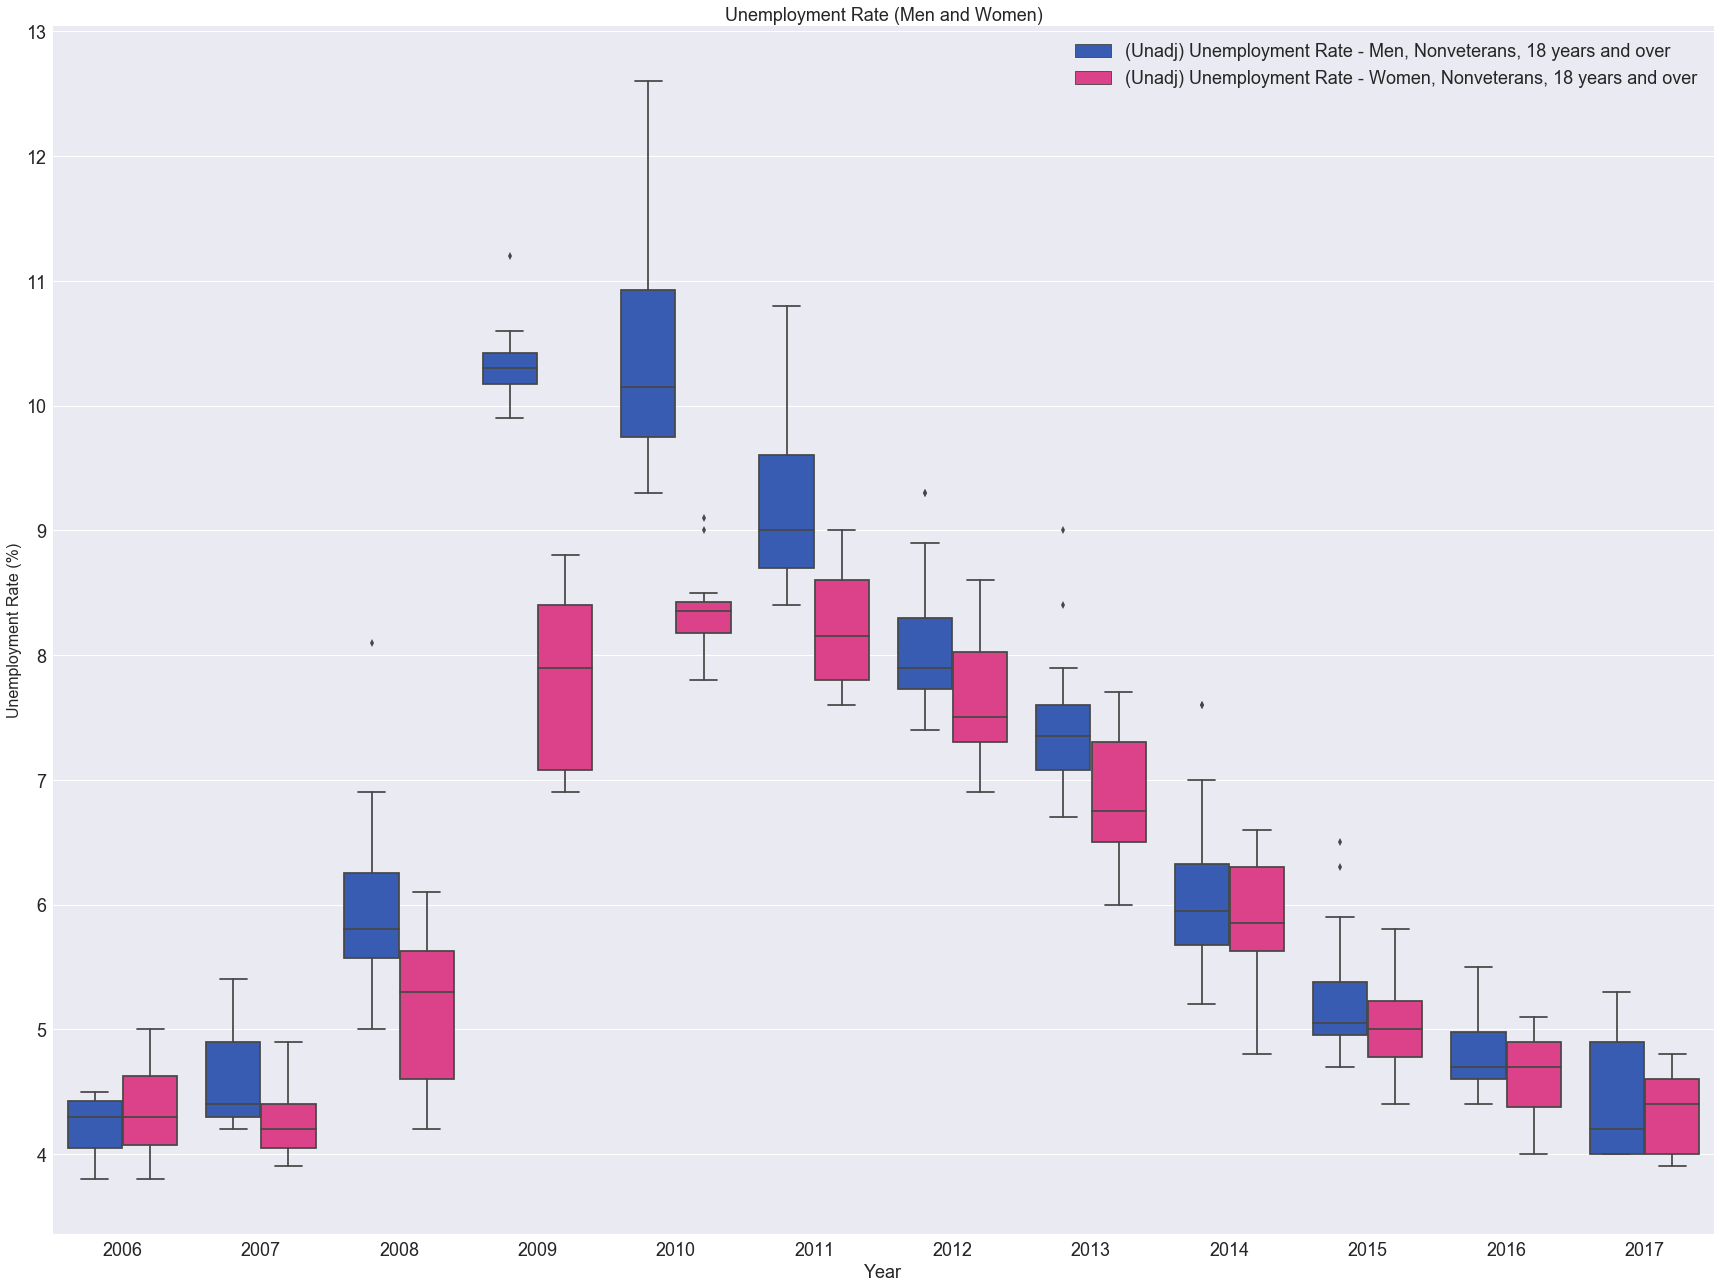

In [28]:
import numpy as np
plt.figure(figsize=(24,18))
plt.yticks(np.arange(0, 100, 1),fontsize=18)
plt.xticks(fontsize=18)
sns.boxplot(x='year',y='value',data=men_women_combined_monthly,hue='series_title',palette=['#2554C7','#F52887'])
plt.title('Unemployment Rate (Men and Women)',fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Unemployment Rate (%)', fontsize=16)
plt.tight_layout()
plt.legend(fontsize=18)

In [29]:
all_races_combined=pd.concat([non_veterans_monthly_18_and_over_annually_rate_Asian,non_veterans_monthly_18_and_over_annually_rate_Hispanic,non_veterans_monthly_18_and_over_annually_rate_black,non_veterans_monthly_18_and_over_annually_rate_white])

# Box Plot depicting unemployment rate (Men and Women ) over the year

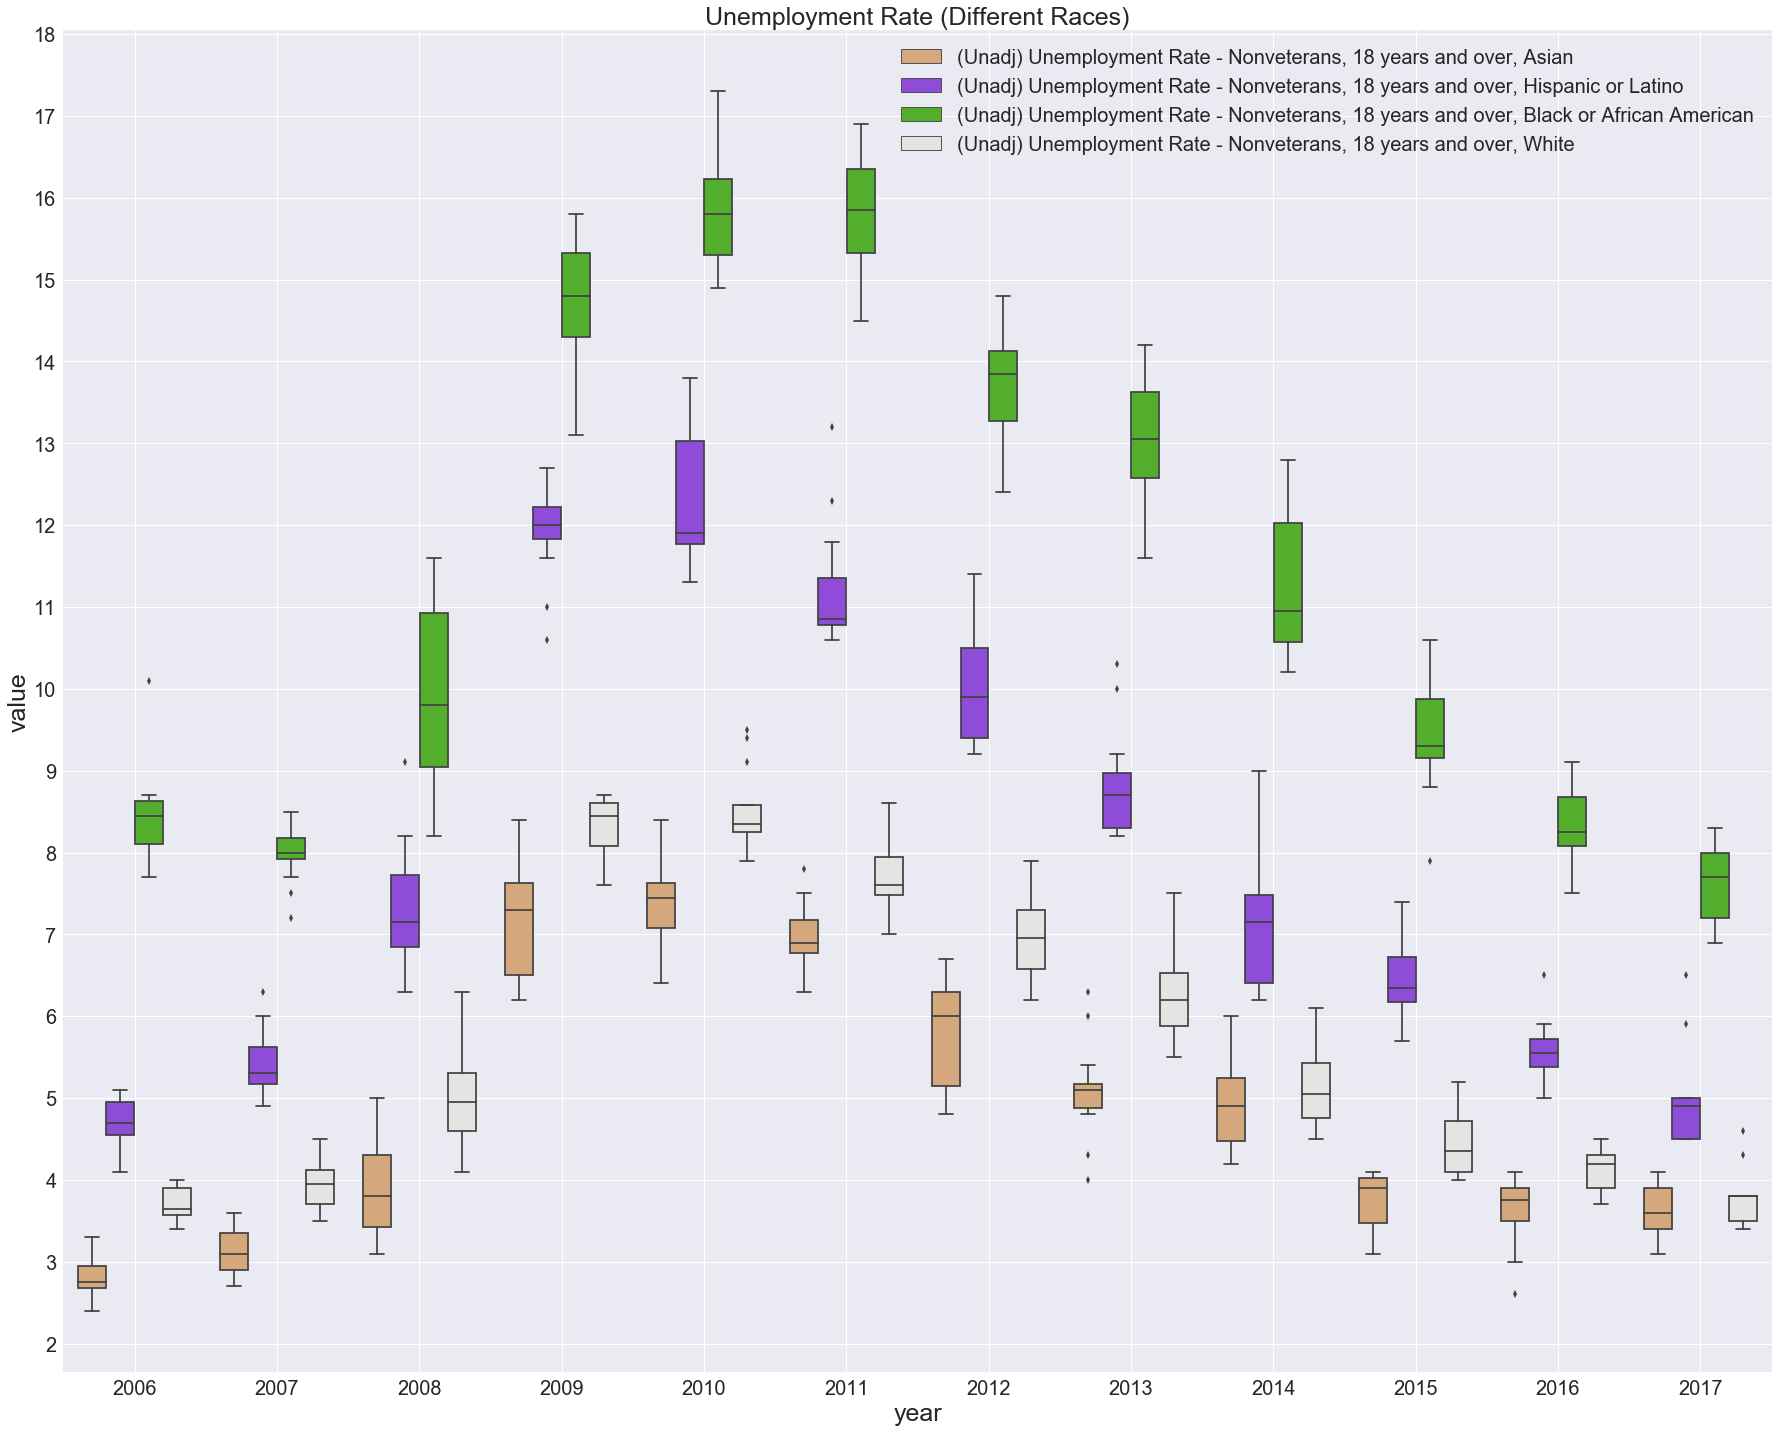

In [30]:
import numpy as np
plt.figure(figsize=(25,20))
plt.yticks(np.arange(0, 100, 1),fontsize=20)
plt.xticks(fontsize=20)
plt.title('Unemployment Rate (Different Races)',fontsize=25)
plt.xlabel('Year', fontsize=25)
plt.ylabel('Unemployment Rate (%)', fontsize=25)
plt.tight_layout()
plt.grid(True,which='both')
sns.boxplot(x='year',y='value',data=all_races_combined,hue='series_title',palette=['#E2A76F','#8E35EF','#4CC417','#E5E4E2'])
plt.legend(fontsize=20)
plt.grid(True)


# Interactive box plots for the same data

In [31]:
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go


trace0 = go.Box(
    x = non_veterans_monthly_18_and_over_annually_rate_women['year'],
    y=non_veterans_monthly_18_and_over_annually_rate_women['value'],
    name = 'Women',
    xaxis="Year",
    yaxis="Rate"
)

trace1 = go.Box(
    x = non_veterans_monthly_18_and_over_annually_rate_men['year'],
    y=non_veterans_monthly_18_and_over_annually_rate_men['value'],
    name = 'Men',
    xaxis="Year",
    yaxis="Rate"
)


fig = tools.make_subplots(rows=2, cols=1,horizontal_spacing=0.5,vertical_spacing=0.2,subplot_titles=('Unemployment Rate Women','Unemployment Rate Men'))
                                                        #  'Unemployment Rate Women', 'Unemployment Rate Asian',
                                                         #'Unemployment Rate White','Unemployment Rate Black or African American',
                                                         #'Unemployment Rate Hispanic or Latino'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)


fig['layout'].update(height=800, width=1000, title='Unemployment Rate')

iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



In [32]:
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go


trace0 = go.Box(
    x = non_veterans_monthly_18_and_over_annually_rate_Asian['year'],
    y=non_veterans_monthly_18_and_over_annually_rate_Asian['value'],
    name = 'Asian',
    xaxis="Year",
    yaxis="Rate"
)

trace1 = go.Box(
    x = non_veterans_monthly_18_and_over_annually_rate_Hispanic['year'],
    y=non_veterans_monthly_18_and_over_annually_rate_Hispanic['value'],
    name = 'Hispanic or Latino',
    xaxis="Year",
    yaxis="Rate"
)




fig = tools.make_subplots(rows=2, cols=1,horizontal_spacing=0.5,vertical_spacing=0.2,subplot_titles=('Unemployment Rate Asian','Unemployment Rate Hispanic or Latino'))
                                                        #  'Unemployment Rate Women', 'Unemployment Rate Asian',
                                                         #'Unemployment Rate White','Unemployment Rate Black or African American',
                                                         #'Unemployment Rate Hispanic or Latino'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)



fig['layout'].update(height=800, width=1000, title='Unemployment Rate')

iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



In [33]:
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go


trace0 = go.Box(
    x = non_veterans_monthly_18_and_over_annually_rate_black['year'],
    y=non_veterans_monthly_18_and_over_annually_rate_black['value'],
    name = 'Black or African American',
    xaxis="Year",
    yaxis="Rate"
)

trace1 = go.Box(
    x = non_veterans_monthly_18_and_over_annually_rate_white['year'],
    y=non_veterans_monthly_18_and_over_annually_rate_white['value'],
    name = 'White',
    xaxis="Year",
    yaxis="Rate"
)




fig = tools.make_subplots(rows=2, cols=1,horizontal_spacing=0.5,vertical_spacing=0.2,subplot_titles=('Unemployment Rate Black or African American','Unemployment Rate White'))
                                                        #  'Unemployment Rate Women', 'Unemployment Rate Asian',
                                                         #'Unemployment Rate White','Unemployment Rate Black or African American',
                                                         #'Unemployment Rate Hispanic or Latino'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)



fig['layout'].update(height=800, width=1000, title='Unemployment Rate')

iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



# Line chart showing the unemploymnet rate(All Gender) for every month in a given year (2006-2016)

In [34]:
import plotly.graph_objs as go
# Create traces
trace0 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2007]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2007]['value'],
    mode = 'lines+markers',
    name = '2007',

)
trace1 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2008]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2008]['value'],
    mode = 'lines+markers',
    name = '2008',
)

trace2 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2009]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2009]['value'],
    mode = 'lines+markers',
    name = '2009',
)

trace3 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2010]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2010]['value'],
    mode = 'lines+markers',
    name = '2010',
)

trace4 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2011]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2011]['value'],
    mode = 'lines+markers',
    name = '2011',
)

trace5 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2012]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2012]['value'],
    mode = 'lines+markers',
    name = '2012',
)

trace6 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2013]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2013]['value'],
    mode = 'lines+markers',
    name = '2013',
)

trace7 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2014]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2014]['value'],
    mode = 'lines+markers',
    name = '2014',
)

trace8 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2015]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2015]['value'],
    mode = 'lines+markers',
    name = '2015',
)

trace9 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2016]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_all[non_veterans_monthly_18_and_over_annually_rate_all['year']==2016]['value'],
    mode = 'lines+markers',
    name = '2016',
)

layout= go.Layout(
    title= 'Unemployment Rate(All)',
    xaxis= dict(
        title= 'Months',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Unemployment Rate(%)',
        ticklen= 1,
        gridwidth= 2,
        dtick=0.25
    ),
    showlegend= True
)

data = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)



# Line chart showing the unemploymnet rate(Men) for every month in a given year (2006-2016)

In [35]:
import plotly.graph_objs as go
# Create traces
trace0 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2007]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2007]['value'],
    mode = 'lines+markers',
    name = '2007',

)
trace1 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2008]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2008]['value'],
    mode = 'lines+markers',
    name = '2008',
)

trace2 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2009]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2009]['value'],
    mode = 'lines+markers',
    name = '2009',
)

trace3 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2010]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2010]['value'],
    mode = 'lines+markers',
    name = '2010',
)

trace4 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2011]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2011]['value'],
    mode = 'lines+markers',
    name = '2011',
)

trace5 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2012]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2012]['value'],
    mode = 'lines+markers',
    name = '2012',
)

trace6 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2013]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2013]['value'],
    mode = 'lines+markers',
    name = '2013',
)

trace7 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2014]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2014]['value'],
    mode = 'lines+markers',
    name = '2014',
)

trace8 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2015]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2015]['value'],
    mode = 'lines+markers',
    name = '2015',
)

trace9 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2016]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2016]['value'],
    mode = 'lines+markers',
    name = '2016',
)

layout= go.Layout(
    title= 'Unemployment Rate Men',
    xaxis= dict(
        title= 'Months',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Unemployment Rate(%)',
        ticklen= 1,
        gridwidth= 2,
        dtick=0.25
    ),
    showlegend= True
)

data = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)



# Line chart showing the unemploymnet rate(Women) for every month in a given year (2006-2016)

In [36]:
import plotly.graph_objs as go
# Create traces
trace0 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2007]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2007]['value'],
    mode = 'lines+markers',
    name = '2007',

)
trace1 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2008]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2008]['value'],
    mode = 'lines+markers',
    name = '2008',
)

trace2 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2009]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2009]['value'],
    mode = 'lines+markers',
    name = '2009',
)

trace3 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2010]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2010]['value'],
    mode = 'lines+markers',
    name = '2010',
)

trace4 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2011]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2011]['value'],
    mode = 'lines+markers',
    name = '2011',
)

trace5 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2012]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2012]['value'],
    mode = 'lines+markers',
    name = '2012',
)

trace6 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2013]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2013]['value'],
    mode = 'lines+markers',
    name = '2013',
)

trace7 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2014]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2014]['value'],
    mode = 'lines+markers',
    name = '2014',
)

trace8 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2015]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_men[non_veterans_monthly_18_and_over_annually_rate_men['year']==2015]['value'],
    mode = 'lines+markers',
    name = '2015',
)

trace9 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2016]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_women[non_veterans_monthly_18_and_over_annually_rate_women['year']==2016]['value'],
    mode = 'lines+markers',
    name = '2016',
)

layout= go.Layout(
    title= 'Unemployment Rate Women',
    xaxis= dict(
        title= 'Months',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Unemployment Rate(%)',
        ticklen= 1,
        gridwidth= 2,
        dtick=0.25
    ),
    showlegend= True
)

data = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)



# Line chart showing the unemploymnet rate(Asian) for every month in a given year (2006-2016)

In [37]:
import plotly.graph_objs as go
# Create traces
trace0 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2007]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2007]['value'],
    mode = 'lines+markers',
    name = '2007',

)
trace1 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2008]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2008]['value'],
    mode = 'lines+markers',
    name = '2008',
)

trace2 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2009]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2009]['value'],
    mode = 'lines+markers',
    name = '2009',
)

trace3 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2010]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2010]['value'],
    mode = 'lines+markers',
    name = '2010',
)

trace4 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2011]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2011]['value'],
    mode = 'lines+markers',
    name = '2011',
)

trace5 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2012]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2012]['value'],
    mode = 'lines+markers',
    name = '2012',
)

trace6 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2013]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2013]['value'],
    mode = 'lines+markers',
    name = '2013',
)

trace7 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2014]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2014]['value'],
    mode = 'lines+markers',
    name = '2014',
)

trace8 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2015]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2015]['value'],
    mode = 'lines+markers',
    name = '2015',
)

trace9 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2016]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Asian[non_veterans_monthly_18_and_over_annually_rate_Asian['year']==2016]['value'],
    mode = 'lines+markers',
    name = '2016',
)

layout= go.Layout(
    title= 'Unemployment Rate Asian',
    xaxis= dict(
        title= 'Months',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Unemployment Rate(%)',
        ticklen= 1,
        gridwidth= 1,
        dtick=0.25
    ),
    showlegend= True
)

data = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)



# Line chart showing the unemploymnet rate(Black or African American ) for every month in a given year (2006-2016)

In [38]:
import plotly.graph_objs as go
# Create traces
trace0 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2007]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2007]['value'],
    mode = 'lines+markers',
    name = '2007',

)
trace1 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2008]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2008]['value'],
    mode = 'lines+markers',
    name = '2008',
)

trace2 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2009]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2009]['value'],
    mode = 'lines+markers',
    name = '2009',
)

trace3 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2010]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2010]['value'],
    mode = 'lines+markers',
    name = '2010',
)

trace4 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2011]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2011]['value'],
    mode = 'lines+markers',
    name = '2011',
)

trace5 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2012]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2012]['value'],
    mode = 'lines+markers',
    name = '2012',
)

trace6 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2013]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2013]['value'],
    mode = 'lines+markers',
    name = '2013',
)

trace7 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2014]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2014]['value'],
    mode = 'lines+markers',
    name = '2014',
)

trace8 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2015]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2015]['value'],
    mode = 'lines+markers',
    name = '2015',
)

trace9 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2016]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_black[non_veterans_monthly_18_and_over_annually_rate_black['year']==2016]['value'],
    mode = 'lines+markers',
    name = '2016',
)

layout= go.Layout(
    title= 'Unemployment Rate Black or African American',
    xaxis= dict(
        title= 'Months',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Unemployment Rate(%)',
        ticklen= 1,
        gridwidth= 2,
        dtick=0.25
    ),
    showlegend= True
)

data = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)



# Line chart showing the unemploymnet rate(Hispanic or Latino) for every month in a given year (2006-2016)

In [39]:
import plotly.graph_objs as go
# Create traces
trace0 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2007]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2007]['value'],
    mode = 'lines+markers',
    name = '2007',

)
trace1 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2008]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2008]['value'],
    mode = 'lines+markers',
    name = '2008',
)

trace2 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2009]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2009]['value'],
    mode = 'lines+markers',
    name = '2009',
)

trace3 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2010]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2010]['value'],
    mode = 'lines+markers',
    name = '2010',
)

trace4 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2011]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2011]['value'],
    mode = 'lines+markers',
    name = '2011',
)

trace5 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2012]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2012]['value'],
    mode = 'lines+markers',
    name = '2012',
)

trace6 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2013]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2013]['value'],
    mode = 'lines+markers',
    name = '2013',
)

trace7 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2014]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2014]['value'],
    mode = 'lines+markers',
    name = '2014',
)

trace8 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2015]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2015]['value'],
    mode = 'lines+markers',
    name = '2015',
)

trace9 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2016]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_Hispanic[non_veterans_monthly_18_and_over_annually_rate_Hispanic['year']==2016]['value'],
    mode = 'lines+markers',
    name = '2016',
)

layout= go.Layout(
    title= 'Unemployment Rate Hispanic or Latino',
    xaxis= dict(
        title= 'Months',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Unemployment Rate(%)',
        ticklen= 1,
        gridwidth= 2,
        dtick=0.25
    ),
    showlegend= True
)

data = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)



# Line chart showing the unemploymnet rate(Whites) for every month in a given year (2006-2016)

In [40]:
import plotly.graph_objs as go
# Create traces
trace0 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2007]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2007]['value'],
    mode = 'lines+markers',
    name = '2007',

)
trace1 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2008]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2008]['value'],
    mode = 'lines+markers',
    name = '2008',
)

trace2 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2009]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2009]['value'],
    mode = 'lines+markers',
    name = '2009',
)

trace3 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2010]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2010]['value'],
    mode = 'lines+markers',
    name = '2010',
)

trace4 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2011]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2011]['value'],
    mode = 'lines+markers',
    name = '2011',
)

trace5 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2012]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2012]['value'],
    mode = 'lines+markers',
    name = '2012',
)

trace6 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2013]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2013]['value'],
    mode = 'lines+markers',
    name = '2013',
)

trace7 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2014]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2014]['value'],
    mode = 'lines+markers',
    name = '2014',
)

trace8 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2015]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2015]['value'],
    mode = 'lines+markers',
    name = '2015',
)

trace9 = go.Scatter(
    x = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2016]['period'],
    y = non_veterans_monthly_18_and_over_annually_rate_white[non_veterans_monthly_18_and_over_annually_rate_white['year']==2016]['value'],
    mode = 'lines+markers',
    name = '2016',
)

layout= go.Layout(
    title= 'Unemployment Rate White',
    xaxis= dict(
        title= 'Months',
        ticklen= 1,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Unemployment Rate(%)',
        ticklen= 1,
        gridwidth= 2,
        dtick=0.25
    ),
    showlegend= True
)

data = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)



# Convert the annual data into a format suitable for cluster Maps

In [41]:
non_veterans_monthly_18_and_over_annually_rate_pivot=non_veterans_monthly_18_and_over_annually_rate.pivot_table(index="year",columns="series_title",values="value")
non_veterans_18_and_over_annually.reset_index(level=0,inplace=True)

# Changing the column names so the they are clearly visible in cluster maps

In [42]:
non_veterans_monthly_18_and_over_annually_rate_pivot=non_veterans_monthly_18_and_over_annually_rate_pivot.rename(columns = {'(Unadj) Unemployment Rate - Nonveterans, 18 years and over':'All'})
non_veterans_monthly_18_and_over_annually_rate_pivot=non_veterans_monthly_18_and_over_annually_rate_pivot.rename(columns = {'(Unadj) Unemployment Rate - Men, Nonveterans, 18 years and over':'Men'})
non_veterans_monthly_18_and_over_annually_rate_pivot=non_veterans_monthly_18_and_over_annually_rate_pivot.rename(columns = {'(Unadj) Unemployment Rate - Women, Nonveterans, 18 years and over':'Women'})
non_veterans_monthly_18_and_over_annually_rate_pivot=non_veterans_monthly_18_and_over_annually_rate_pivot.rename(columns = {'(Unadj) Unemployment Rate - Nonveterans, 18 years and over, Asian':'Asian'})
non_veterans_monthly_18_and_over_annually_rate_pivot=non_veterans_monthly_18_and_over_annually_rate_pivot.rename(columns = {'(Unadj) Unemployment Rate - Nonveterans, 18 years and over, Black or African American':'Black or African American'})
non_veterans_monthly_18_and_over_annually_rate_pivot=non_veterans_monthly_18_and_over_annually_rate_pivot.rename(columns = {'(Unadj) Unemployment Rate - Nonveterans, 18 years and over, White':'White'})
non_veterans_monthly_18_and_over_annually_rate_pivot=non_veterans_monthly_18_and_over_annually_rate_pivot.rename(columns = {'(Unadj) Unemployment Rate - Nonveterans, 18 years and over, Hispanic or Latino':'Hispanic or Latino'})



In [43]:
non_veterans_monthly_18_and_over_annually_rate_pivot

series_title,Men,All,Asian,Black or African American,Hispanic or Latino,White,Women
year,,,,,,,
2006,4.225000,4.287500,2.812500,8.500000,4.700000,3.700000,4.350000
2007,4.616667,4.450000,3.133333,8.000000,5.425000,3.941667,4.266667
2008,6.008333,5.591667,3.875000,9.891667,7.333333,4.991667,5.166667
2009,10.333333,9.091667,7.191667,14.683333,11.916667,8.316667,7.816667
2010,10.508333,9.433333,7.400000,15.825000,12.316667,8.516667,8.375000
2011,9.300000,8.750000,6.975000,15.825000,11.233333,7.725000,8.216667
2012,8.125000,7.891667,5.841667,13.716667,10.041667,7.000000,7.650000
2013,7.475000,7.158333,5.100000,13.033333,8.841667,6.275000,6.816667
2014,6.175000,6.033333,4.925000,11.283333,7.183333,5.150000,5.866667


# Cluster Map for Men And Women (2006-2017)

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning:

The axisbg attribute was deprecated in version 2.0. Use facecolor instead.



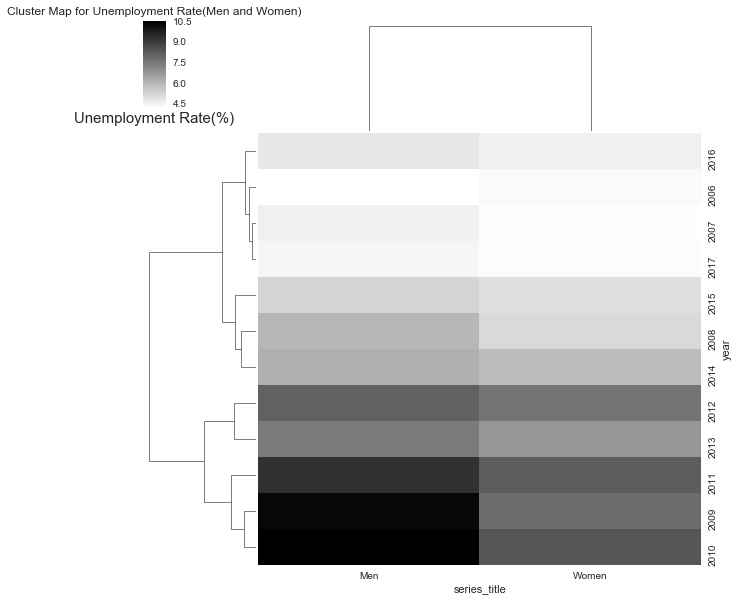

In [44]:
plt.figure(figsize=(50,15))
g=sns.clustermap(data=non_veterans_monthly_18_and_over_annually_rate_pivot.iloc[:,[0,-1]],cmap="binary",col_cluster=True)
plt.xlabel('Unemployment Rate(%)',fontsize=15)
plt.title('Cluster Map for Unemployment Rate(Men and Women)')


# Cluster Map for All Races (2006-2017)

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning:

The axisbg attribute was deprecated in version 2.0. Use facecolor instead.



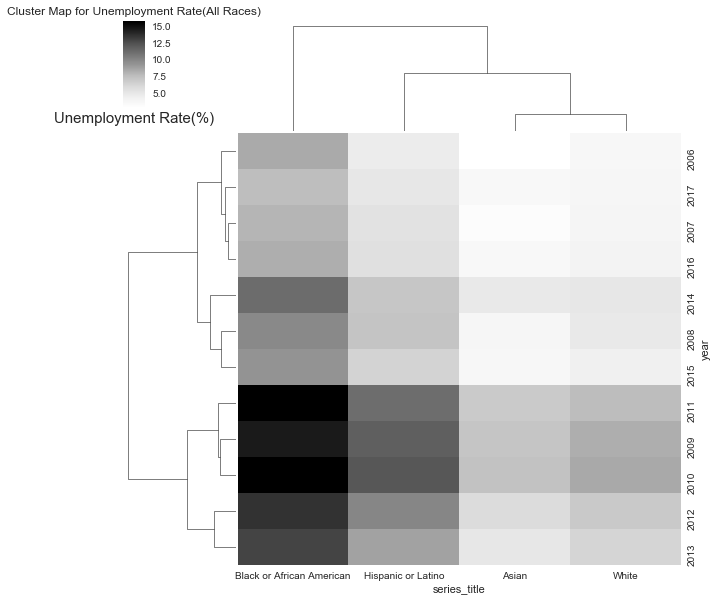

In [45]:
plt.figure(figsize=(25,15))

g=sns.clustermap(data=non_veterans_monthly_18_and_over_annually_rate_pivot.iloc[:,2:6],cmap="Greys",col_cluster=True)
plt.xlabel('Unemployment Rate(%)',fontsize=15)
plt.title('Cluster Map for Unemployment Rate(All Races)')



# Statewise Data  

In [46]:
input_data = pd.read_csv('statewise_data.csv')
years = range(2003, 2017)

In [47]:
input_data['ScaledWorkForce'] = input_data['WorkForce'] / 1000000

In [48]:
input_data.head()

,Year,ST,STATE,TotalPopulation,WorkForce,Employed,EmployedPercent,Unemployed,UnemployedPercent,H_MEAN,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,ScaledWorkForce
0,2003,AL,Alabama,"45,03,491",2120238,1992742,93.986713,127496,6.013287,15.06,6.37,7.97,11.52,18.33,27.23,2.120238
1,2003,AK,Alaska,"6,48,414",331673,305725,92.176632,25948,7.823368,19.51,8.38,11.18,16.55,24.64,34.00,0.331673
2,2003,AZ,Arizona,"55,10,364",2736001,2578855,94.256362,157146,5.743638,16.14,6.68,8.63,12.76,19.54,28.87,2.736001
3,2003,AR,Arkansas,"27,24,816",1271706,1196303,94.070721,75403,5.929279,13.72,6.41,7.95,10.99,16.32,23.41,1.271706
4,2003,CA,California,"3,52,53,159",17277624,16102841,93.200552,1174783,6.799448,19.54,7.52,9.46,14.99,24.28,36.62,17.277624


In [49]:
input_data.head()

,Year,ST,STATE,TotalPopulation,WorkForce,Employed,EmployedPercent,Unemployed,UnemployedPercent,H_MEAN,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,ScaledWorkForce
0,2003,AL,Alabama,"45,03,491",2120238,1992742,93.986713,127496,6.013287,15.06,6.37,7.97,11.52,18.33,27.23,2.120238
1,2003,AK,Alaska,"6,48,414",331673,305725,92.176632,25948,7.823368,19.51,8.38,11.18,16.55,24.64,34.00,0.331673
2,2003,AZ,Arizona,"55,10,364",2736001,2578855,94.256362,157146,5.743638,16.14,6.68,8.63,12.76,19.54,28.87,2.736001
3,2003,AR,Arkansas,"27,24,816",1271706,1196303,94.070721,75403,5.929279,13.72,6.41,7.95,10.99,16.32,23.41,1.271706
4,2003,CA,California,"3,52,53,159",17277624,16102841,93.200552,1174783,6.799448,19.54,7.52,9.46,14.99,24.28,36.62,17.277624


# Finding the top 7 states with highest workforce

In [50]:
#to find the names of top 5 states with the highest WorkForce population
temp = input_data.groupby('STATE').sum()
temp.sort_values('WorkForce', ascending=False).head(7)

,Year,WorkForce,Employed,EmployedPercent,Unemployed,UnemployedPercent,H_MEAN,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,ScaledWorkForce
STATE,,,,,,,,,,,,,
California,28133,254782233,234796026,1290.483631,19986207,109.516369,330.05,122.34,153.92,246.61,415.46,643.15,254.782233
Texas,28133,168988560,159020716,1317.396214,9967844,82.603786,275.13,106.17,133.26,206.02,335.61,517.42,168.988560
New York,28133,133517187,124965430,1310.394940,8551757,89.605060,340.11,118.95,160.34,255.66,420.02,652.84,133.517187
Florida,28133,128219277,119868151,1309.226072,8351126,90.773928,261.10,111.22,136.78,198.12,309.29,471.13,128.219277
Illinois,28133,91394002,84745228,1298.300936,6648774,101.699064,302.00,115.76,145.82,229.31,378.09,567.78,91.394002
Pennsylvania,28133,89103301,83591106,1313.500783,5512195,86.499217,280.35,112.57,146.83,220.19,342.81,510.02,89.103301
Ohio,28133,81582345,76000975,1304.248873,5581370,95.751127,272.02,112.13,142.03,215.19,336.56,484.52,81.582345


In [51]:
top_states_workforce = ['California', 'Texas', 'New York', 'Florida', 'Illinois', 'Pennsylvania', 'Ohio']

# Unemployment Rate for top 7 states with highest workforce

In [52]:
measure = "UnemployedPercent"
text = "WorkForce"

graph1 = go.Scatter(x = input_data[input_data['STATE'] == 'California']['Year'], y = input_data[input_data['STATE'] == 'California']['UnemployedPercent'], 
                    mode = 'lines+markers', name = 'California', 
                    marker = dict(color = 'Firebrick'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'California']['UnemployedPercent']])
graph2 = go.Scatter(x = input_data[input_data['STATE'] == 'Texas']['Year'], y = input_data[input_data['STATE'] == 'Texas'][measure], 
                    mode = 'lines+markers', name = 'Texas', 
                    marker = dict(color = '#5f9ea0'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Texas']['UnemployedPercent']])
graph3 = go.Scatter(x = input_data[input_data['STATE'] == 'New York']['Year'], y = input_data[input_data['STATE'] == 'New York'][measure], 
                    mode = 'lines+markers', name = 'New York', 
                    marker = dict(color = '#6b8e23'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'New York']['UnemployedPercent']])
graph4 = go.Scatter(x = input_data[input_data['STATE'] == 'Florida']['Year'], y = input_data[input_data['STATE'] == 'Florida'][measure], 
                    mode = 'lines+markers', name = 'Florida', 
                    marker = dict(color = 'black'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Florida']['UnemployedPercent']])
graph5 = go.Scatter(x = input_data[input_data['STATE'] == 'Illinois']['Year'], y = input_data[input_data['STATE'] == 'Illinois'][measure], 
                    mode = 'lines+markers', name = 'Illinois', 
                    marker = dict(color = '#696969'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Illinois']['UnemployedPercent']])
graph6 = go.Scatter(x = input_data[input_data['STATE'] == 'Pennsylvania']['Year'], y = input_data[input_data['STATE'] == 'Pennsylvania'][measure], 
                    mode = 'lines+markers', name = 'Pennsylvania', 
                    marker = dict(color = 'orange'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Pennsylvania']['UnemployedPercent']])
graph7 = go.Scatter(x = input_data[input_data['STATE'] == 'Ohio']['Year'], y = input_data[input_data['STATE'] == 'Ohio'][measure], 
                    mode = 'lines+markers', name = 'Ohio', 
                    marker = dict(color = '#b8860b'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Ohio']['UnemployedPercent']])
graph8 = go.Scatter(x = input_data[input_data['STATE'] == 'Indiana']['Year'], y = input_data[input_data['STATE'] == 'Indiana'][measure], 
                    mode = 'lines+markers', name = 'Indiana', 
                    line = dict(color = ('#9370db'), width = 4, dash = 'dash'),
                    marker = dict(color = '#9370db'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Indiana']['UnemployedPercent']])

layout = go.Layout(
    title= 'Unemployment Rate (top 7 states with the highest WorkForce population)',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Year',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
        dtick= 1
    ),
    yaxis=dict(
        title= 'Unemployment Rate (%)',
        ticklen= 5,
        gridwidth= 2,
        dtick= 0.25
    ),
    showlegend= True
)

data = [graph1, graph2, graph3, graph4, graph5, graph6, graph7, graph8]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)

# Unemployment Rate (top 5 states with the highest Unemployment Rate and 2 states with least unemployment rate )

In [53]:
input_data.sort_values('UnemployedPercent', ascending=False)

,Year,ST,STATE,TotalPopulation,WorkForce,Employed,EmployedPercent,Unemployed,UnemployedPercent,H_MEAN,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,ScaledWorkForce
407,2010,PR,Puerto Rico,"37,21,525",1268673,1061056,83.635105,207617,16.364895,12.92,7.55,8.03,9.42,14.58,21.54,1.268673
458,2011,PR,Puerto Rico,"36,78,732",1220246,1025560,84.045348,194686,15.954652,13.07,7.79,8.42,9.54,14.72,21.50,1.220246
356,2009,PR,Puerto Rico,"37,40,410",1301275,1101868,84.676029,199407,15.323971,12.35,6.95,7.48,9.26,14.08,20.55,1.301275
509,2012,PR,Puerto Rico,"36,34,488",1194288,1021392,85.523090,172896,14.476910,13.12,7.83,8.45,9.61,14.80,21.56,1.194288
560,2013,PR,Puerto Rico,"35,93,077",1166310,999534,85.700543,166776,14.299457,13.13,7.82,8.43,9.51,14.84,21.95,1.166310
611,2014,PR,Puerto Rico,"35,34,874",1134274,976465,86.087224,157809,13.912776,13.23,7.82,8.41,9.42,14.60,22.73,1.134274
327,2009,MI,Michigan,"99,01,591",4903550,4233804,86.341610,669746,13.658390,20.64,8.19,10.67,16.22,25.81,37.62,4.903550
384,2010,NV,Nevada,"27,03,284",1358580,1174775,86.470800,183805,13.529200,19.82,8.36,10.74,15.47,24.16,35.95,1.358580
435,2011,NV,Nevada,"27,18,379",1373117,1194265,86.974744,178852,13.025256,20.13,8.52,10.77,15.70,24.51,36.46,1.373117
378,2010,MI,Michigan,"98,77,495",4798964,4194045,87.394800,604919,12.605200,20.81,8.42,10.68,16.26,26.01,37.86,4.798964


In [54]:
input_data.sort_values('UnemployedPercent', ascending=True)

,Year,ST,STATE,TotalPopulation,WorkForce,Employed,EmployedPercent,Unemployed,UnemployedPercent,H_MEAN,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,ScaledWorkForce
247,2007,UT,Utah,"25,97,746",1359136,1324060,97.419243,35076,2.580757,17.83,7.66,9.76,13.99,21.45,32.01,1.359136
163,2006,HI,Hawaii,"13,09,731",638262,621574,97.385400,16688,2.614600,18.57,7.61,10.16,14.97,22.96,33.96,0.638262
594,2014,ND,North Dakota,"7,39,904",415361,404206,97.314384,11155,2.685616,21.20,9.34,12.46,17.75,25.79,35.98,0.415361
645,2015,ND,North Dakota,"7,56,835",414255,402674,97.204379,11581,2.795621,21.95,9.70,12.97,18.35,26.61,37.12,0.414255
214,2007,HI,Hawaii,"13,15,675",638395,620535,97.202359,17860,2.797641,19.33,8.09,10.71,15.54,23.91,35.09,0.638395
253,2007,WY,Wyoming,"5,34,876",286558,278485,97.182769,8073,2.817231,17.36,7.43,9.96,14.66,21.94,30.16,0.286558
703,2016,SD,South Dakota,"8,65,454",453073,440297,97.180145,12776,2.819855,19.27,9.36,11.24,15.19,22.45,32.47,0.453073
244,2007,SD,South Dakota,"7,91,623",442510,430018,97.177013,12492,2.822987,15.16,7.45,9.30,12.37,17.67,25.78,0.442510
691,2016,NH,New Hampshire,"13,34,795",748566,727417,97.174731,21149,2.825269,24.13,9.32,12.34,18.40,28.87,44.21,0.748566
112,2005,HI,Hawaii,"12,92,729",626913,608957,97.135807,17956,2.864193,17.81,7.33,9.84,14.39,21.86,32.48,0.626913


In [55]:
input_data[input_data['STATE'] == 'Indiana']

,Year,ST,STATE,TotalPopulation,WorkForce,Employed,EmployedPercent,Unemployed,UnemployedPercent,H_MEAN,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,ScaledWorkForce
13,2003,IN,Indiana,"61,96,638",3182994,3014660,94.711457,168334,5.288543,15.90,6.95,9.06,12.88,19.52,27.50,3.182994
64,2004,IN,Indiana,"62,33,007",3167810,2998076,94.641913,169734,5.358087,16.13,7.02,9.19,13.11,19.97,27.79,3.167810
115,2005,IN,Indiana,"62,78,616",3205441,3029959,94.525496,175482,5.474504,16.38,7.07,9.29,13.30,20.28,28.30,3.205441
166,2006,IN,Indiana,"63,32,669",3235120,3072118,94.961485,163002,5.038515,16.92,7.23,9.51,13.70,20.86,29.61,3.235120
217,2007,IN,Indiana,"63,79,599",3207691,3061042,95.428207,146649,4.571793,17.51,7.37,9.75,14.13,21.55,30.81,3.207691
268,2008,IN,Indiana,"64,24,806",3232097,3041827,94.113110,190270,5.886890,18.16,7.62,10.01,14.59,22.25,31.86,3.232097
319,2009,IN,Indiana,"64,59,325",3194005,2864992,89.699046,329013,10.300954,18.43,7.77,10.04,14.72,22.47,32.40,3.194005
370,2010,IN,Indiana,"64,90,528",3175193,2845605,89.619907,329588,10.380093,18.76,8.18,10.13,14.85,22.68,33.25,3.175193
421,2011,IN,Indiana,"65,16,480",3181998,2891947,90.884627,290051,9.115373,19.08,8.39,10.22,15.04,23.05,34.12,3.181998
472,2012,IN,Indiana,"65,37,743",3169843,2905553,91.662363,264290,8.337637,19.38,8.44,10.30,15.26,23.45,34.70,3.169843


In [56]:
measure = "UnemployedPercent"
text = "WorkForce"

graph1 = go.Scatter(x = input_data[input_data['STATE'] == 'Puerto Rico']['Year'], y = input_data[input_data['STATE'] == 'Puerto Rico'][measure], 
                    mode = 'lines+markers', name = 'Puerto Rico', 
                    marker = dict(color = 'Firebrick'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Puerto Rico']['WorkForce']])
graph2 = go.Scatter(x = input_data[input_data['STATE'] == 'Michigan']['Year'], y = input_data[input_data['STATE'] == 'Michigan'][measure], 
                    mode = 'lines+markers', name = 'Michigan', 
                    marker = dict(color = '#5f9ea0'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Michigan']['WorkForce']])
graph3 = go.Scatter(x = input_data[input_data['STATE'] == 'Nevada']['Year'], y = input_data[input_data['STATE'] == 'Nevada'][measure], 
                    mode = 'lines+markers', name = 'Nevada', 
                    marker = dict(color = '#6b8e23'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Nevada']['WorkForce']])
graph4 = go.Scatter(x = input_data[input_data['STATE'] == 'California']['Year'], y = input_data[input_data['STATE'] == 'California'][measure], 
                    mode = 'lines+markers', name = 'California', 
                    marker = dict(color = 'black'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'California']['WorkForce']])
graph5 = go.Scatter(x = input_data[input_data['STATE'] == 'Oregon']['Year'], y = input_data[input_data['STATE'] == 'Oregon'][measure], 
                    mode = 'lines+markers', name = 'Oregon', 
                    marker = dict(color = '#696969'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Oregon']['WorkForce']])
graph6 = go.Scatter(x = input_data[input_data['STATE'] == 'Utah']['Year'], y = input_data[input_data['STATE'] == 'Utah'][measure], 
                    mode = 'lines+markers', name = 'Utah', 
                    marker = dict(color = 'orange'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Utah']['WorkForce']])
graph7 = go.Scatter(x = input_data[input_data['STATE'] == 'Hawaii']['Year'], y = input_data[input_data['STATE'] == 'Hawaii'][measure], 
                    mode = 'lines+markers', name = 'Hawaii', 
                    marker = dict(color = '#b8860b'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Hawaii']['WorkForce']])
graph8 = go.Scatter(x = input_data[input_data['STATE'] == 'Indiana']['Year'], y = input_data[input_data['STATE'] == 'Indiana'][measure], 
                    mode = 'lines+markers', name = 'Indiana', 
                    line = dict(color = ('#9370db'), width = 4, dash = 'dash'),
                    marker = dict(color = '#9370db'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Indiana']['WorkForce']])

layout = go.Layout(
    title= '5 states with highest Unemployment Rate, 2 states with least Unemployment Rate during the Great Recession',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Year',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
        dtick= 1
    ),
    yaxis=dict(
        title= 'Unemployment Rate (%)',
        ticklen= 5,
        gridwidth= 2,
        dtick= 0.25
    ),
    showlegend= True
)

data = [graph1, graph2, graph3, graph4, graph5, graph6, graph7, graph8]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)

# Median Hourly Wage (top 5 states with the highest Unemployment Rate)

In [57]:
measure = "H_MEDIAN"
text = "WorkForce"

graph1 = go.Scatter(x = input_data[input_data['STATE'] == 'Puerto Rico']['Year'], y = input_data[input_data['STATE'] == 'Puerto Rico'][measure], 
                    mode = 'lines+markers', name = 'Puerto Rico', 
                    marker = dict(color = 'Firebrick'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Puerto Rico']['WorkForce']])
graph2 = go.Scatter(x = input_data[input_data['STATE'] == 'Michigan']['Year'], y = input_data[input_data['STATE'] == 'Michigan'][measure], 
                    mode = 'lines+markers', name = 'Michigan', 
                    marker = dict(color = '#5f9ea0'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Michigan']['WorkForce']])
graph3 = go.Scatter(x = input_data[input_data['STATE'] == 'Nevada']['Year'], y = input_data[input_data['STATE'] == 'Nevada'][measure], 
                    mode = 'lines+markers', name = 'Nevada', 
                    marker = dict(color = '#6b8e23'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Nevada']['WorkForce']])
graph4 = go.Scatter(x = input_data[input_data['STATE'] == 'California']['Year'], y = input_data[input_data['STATE'] == 'California'][measure], 
                    mode = 'lines+markers', name = 'California', 
                    marker = dict(color = 'black'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'California']['WorkForce']])
graph5 = go.Scatter(x = input_data[input_data['STATE'] == 'Oregon']['Year'], y = input_data[input_data['STATE'] == 'Oregon'][measure], 
                    mode = 'lines+markers', name = 'Oregon', 
                    marker = dict(color = '#696969'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Oregon']['WorkForce']])
graph6 = go.Scatter(x = input_data[input_data['STATE'] == 'Utah']['Year'], y = input_data[input_data['STATE'] == 'Utah'][measure], 
                    mode = 'lines+markers', name = 'Utah', 
                    marker = dict(color = 'orange'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Utah']['WorkForce']])
graph7 = go.Scatter(x = input_data[input_data['STATE'] == 'Hawaii']['Year'], y = input_data[input_data['STATE'] == 'Hawaii'][measure], 
                    mode = 'lines+markers', name = 'Hawaii', 
                    marker = dict(color = '#b8860b'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Hawaii']['WorkForce']])
graph8 = go.Scatter(x = input_data[input_data['STATE'] == 'Indiana']['Year'], y = input_data[input_data['STATE'] == 'Indiana'][measure], 
                    mode = 'lines+markers', name = 'Indiana', 
                    line = dict(color = ('#9370db'), width = 4, dash = 'dash'),
                    marker = dict(color = '#9370db'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Indiana']['WorkForce']])

layout = go.Layout(
    title= '5 states with highest Unemployment Rate, 2 states with least Unemployment Rate during the Great Recession',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Year',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
        dtick= 1
    ),
    yaxis=dict(
        title= 'Median Hourly Wage ($)',
        ticklen= 5,
        gridwidth= 2,
        dtick= 0.25
    ),
    showlegend= True
)

data = [graph1, graph2, graph3, graph4, graph5, graph6, graph7, graph8]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)

# Unemployment Rate vs Total Workforce

In [58]:
measure1 = "UnemployedPercent"
measure2 = "ScaledWorkForce"
text = "WorkForce"

graph1y1 = go.Scatter(x = input_data[input_data['STATE'] == 'Utah']['Year'], y = input_data[input_data['STATE'] == 'Puerto Rico'][measure1], 
                    mode = 'lines+markers', name = 'Puerto Rico', 
                    marker = dict(color = 'Firebrick'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Puerto Rico'][text]])
graph1y2 = go.Scatter(x = input_data[input_data['STATE'] == 'Utah']['Year'], y = input_data[input_data['STATE'] == 'Puerto Rico'][measure2], 
                    mode = 'lines+markers', name = 'Puerto Rico', yaxis='y2',
                    line = dict(color = ('Firebrick'), dash = 'dash'),
                    marker = dict(color = 'Firebrick'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Puerto Rico'][text]])

graph2y1 = go.Scatter(x = input_data[input_data['STATE'] == 'Utah']['Year'], y = input_data[input_data['STATE'] == 'Michigan'][measure1], 
                    mode = 'lines+markers', name = 'Michigan', 
                    marker = dict(color = '#5f9ea0'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Michigan'][text]])
graph2y2 = go.Scatter(x = input_data[input_data['STATE'] == 'Utah']['Year'], y = input_data[input_data['STATE'] == 'Michigan'][measure2], 
                    mode = 'lines+markers', name = 'Michigan', yaxis='y2',
                    line = dict(color = ('#5f9ea0'), dash = 'dash'),
                    marker = dict(color = '#5f9ea0'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Michigan'][text]])

graph3y1 = go.Scatter(x = input_data[input_data['STATE'] == 'Utah']['Year'], y = input_data[input_data['STATE'] == 'Nevada'][measure1], 
                    mode = 'lines+markers', name = 'Nevada', 
                    marker = dict(color = '#6b8e23'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Nevada'][text]])
graph3y2 = go.Scatter(x = input_data[input_data['STATE'] == 'Utah']['Year'], y = input_data[input_data['STATE'] == 'Nevada'][measure2], 
                    mode = 'lines+markers', name = 'Nevada', yaxis='y2',
                    line = dict(color = ('#6b8e23'), dash = 'dash'),
                    marker = dict(color = '#6b8e23'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Nevada'][text]])

graph4y1 = go.Scatter(x = input_data[input_data['STATE'] == 'Utah']['Year'], y = input_data[input_data['STATE'] == 'California'][measure1], 
                    mode = 'lines+markers', name = 'California', 
                    marker = dict(color = 'black'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'California'][text]])
graph4y2 = go.Scatter(x = input_data[input_data['STATE'] == 'Utah']['Year'], y = input_data[input_data['STATE'] == 'California'][measure2], 
                    mode = 'lines+markers', name = 'California', yaxis='y2',
                    line = dict(color = ('black'), dash = 'dash'),
                    marker = dict(color = 'black'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'California'][text]])

graph5y1 = go.Scatter(x = input_data[input_data['STATE'] == 'Utah']['Year'], y = input_data[input_data['STATE'] == 'Hawaii'][measure1], 
                    mode = 'lines+markers', name = 'Hawaii', 
                    marker = dict(color = '#b8860b'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Hawaii'][text]])
graph5y2 = go.Scatter(x = input_data[input_data['STATE'] == 'Utah']['Year'], y = input_data[input_data['STATE'] == 'Hawaii'][measure2], 
                    mode = 'lines+markers', name = 'Hawaii', yaxis='y2',
                    line = dict(color = ('#b8860b'), dash = 'dash'),
                    marker = dict(color = '#b8860b'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Hawaii'][text]])

graph6y1 = go.Scatter(x = input_data[input_data['STATE'] == 'Utah']['Year'], y = input_data[input_data['STATE'] == 'Indiana'][measure1], 
                    mode = 'lines+markers', name = 'Indiana', 
                    line = dict(color = ('#9370db'), width = 4),
                    marker = dict(color = '#9370db'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Indiana'][text]])
graph6y2 = go.Scatter(x = input_data[input_data['STATE'] == 'Utah']['Year'], y = input_data[input_data['STATE'] == 'Indiana'][measure2], 
                    mode = 'lines+markers', name = 'Indiana', yaxis='y2',
                    line = dict(color = ('#9370db'), width = 4, dash = 'dash'),
                    marker = dict(color = '#9370db'), text = [('Workforce: ' + str(s)) for s in input_data[input_data['STATE'] == 'Indiana'][text]])


layout = go.Layout(
    title= 'Unemployment Rate against the Total Workforce during years 2003-2016',
    hovermode= 'closest',
    xaxis= dict(
        title= 'Year',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
        dtick= 1
    ),
    yaxis=dict(
        title= 'Unemployment Rate (%)',
    ),
    yaxis2=dict(
        title= 'Total Workforce (in millions)',
        overlaying='y',
        side='right'
    ),
    showlegend= True
)

data = [graph1y1, graph1y2, graph2y1, graph2y2, graph3y1, graph3y2, graph4y1, graph4y2, graph5y1, graph5y2, graph6y1, graph6y2]
fig = go.Figure(data = data, layout = layout)
fig['layout'].update(height=800, width=1000)
iplot(fig)